## Insertion des données depuis l'API ##

#### *Récupération de données depuis l'API puis insertion dans la table "main"* ####

In [20]:
data= []

for i in range(1000000,1000610):
    i= i+1
    q = 'tt'+str(i)
    response = requests.get('http://www.omdbapi.com/?i='+q+'&apikey=69c60b3a')
    
    response_info = json.loads(response.text)
    if response_info['Response'] != 'False' and response_info['Type'] == 'movie' and response_info['Genre'] != 'Adult'\
    and response_info['Runtime'] != 'N/A' and response_info['Released'] != 'N/A':
        data.append([response_info['Title'], response_info['Year'], response_info['Released'], response_info['Runtime'], response_info['Genre'], response_info['Director'], 
                     response_info['Country'], response_info['imdbRating'], response_info['imdbVotes'], response_info['imdbID'], response_info['Response']])
        
    #print(response_info)

In [ ]:
def inserer_donnees(conn, sql_insertion_table, donnees):
    try:
        cursor = conn.cursor()
        for d in donnees:
            cursor.execute(sql_insertion_table, d)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de l'insertion des données")
        print(e)
        return
    cursor.close()
    print("Les données ont été insérées avec succès")

In [ ]:
sql_inserer_movies_dict = """
    INSERT INTO main 
    (Title, Year, Released, Runtime, Genre, Director, Country, imdbRating, imdbVotes, imdbID, Response)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

In [ ]:
inserer_donnees(conn, sql_inserer_movies_dict, data)

#### Vérication ####

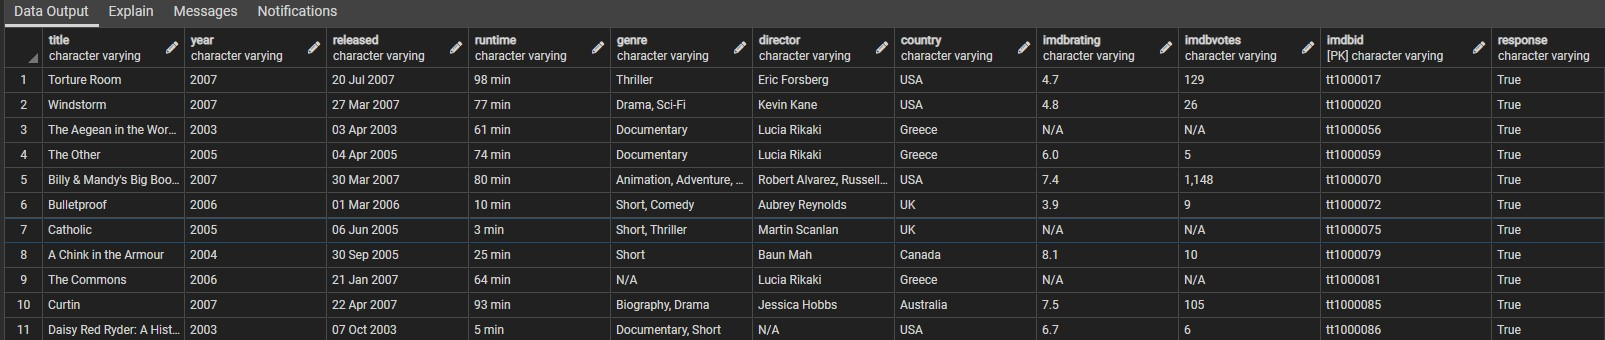

In [25]:
from IPython.display import Image
Image("Snaps/03.jpg")

---

## Mise en place de l'environnement nécessaire à l'affichage d'une partie des données dans index.html ##

#### *Utilisation de la variable "data" créée à l'étape précédente pour ajouter les données dans le fichier index.html par le biais du template choisi* ####

In [16]:
def lire_donnees(conn, sql_requete):
    try:
        cursor = conn.cursor()
        cursor.execute(sql_requete)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de la lecture des données")
        print(e)
        return None
    
    #print("Les données ont été lues avec succès")
    
    data = []
    for row in cursor:
        data.append(row)

    #return data
    print("Les données ont été lues avec succès")

In [14]:
sql_lire_main = """
    SELECT *
    FROM main;
"""

In [17]:
lire_donnees(conn, sql_lire_main)

Les données ont été lues avec succès


#### *Avant de lancer le code, créer un fichier index.html à la racine, puis un dossier "template" avec un fichier "modele.tpl" contenant le template qui servira pour implémenter le premier nommé* ####

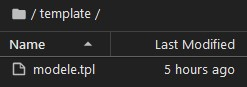

In [26]:
from IPython.display import Image
Image("Snaps/04.jpg")

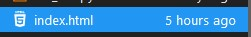

In [27]:
from IPython.display import Image
Image("Snaps/04.1.jpg")

In [15]:
from jinja2 import Environment, FileSystemLoader

def afficher_html(data):
    root = os.path.dirname(os.path.abspath("__file__"))
    templates_dir = os.path.join(root, 'template')
    env = Environment( loader = FileSystemLoader(templates_dir) )
    template = env.get_template('modele.tpl')
    
    
    filename = os.path.join(root, 'index.html')
    with open(filename, 'w') as fh:
        fh.write(template.render(
            h1 = "Hello FlouPics",
            mydata = data
        ))

In [18]:
data = lire_donnees(conn, sql_lire_main)

Les données ont été lues avec succès


In [21]:
afficher_html(data)

---

## Vérification et affichage index.html ##

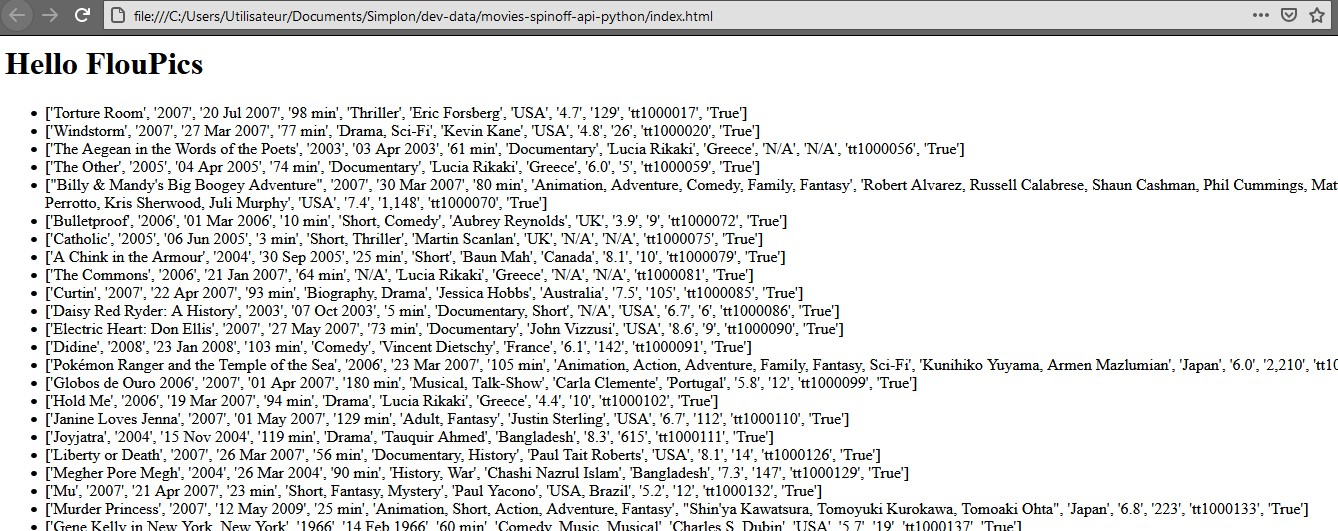

In [28]:
from IPython.display import Image
Image("Snaps/05.jpg")

---